In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

#from sklearn.svm import SVR
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

#from sklearn.linear_model import Ridge

from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
#from sklearn.multioutput import MultiOutputRegressor
import math
#from yellowbrick.regressor import ResidualsPlot
#from sklearn.metrics import r2_score
import sklearn.gaussian_process as gp


In [2]:
df=pd.read_excel("database_new.xlsx")

In [6]:
max(df['q_sca'])

2.9546

In [28]:
def generate_default_kernel_ridge_model(X,Y):
    array_var=[]
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, 
        test_size=0.25, 
        random_state=42)

    scaling_x=StandardScaler()
    scaling_y=StandardScaler()
    X_train=scaling_x.fit_transform(X_train)
    X_test=scaling_x.transform(X_test)
    Y_train=scaling_y.fit_transform(Y_train)
    #Y_test=scaling_y.transform(Y_test)

    regressor= KernelRidge()
    model=regressor.fit(X_train,Y_train)
    print(model.get_params())

    array_var.extend([model, X_train, Y_train, X_test, Y_test, scaling_y])
    return array_var


In [37]:
def grid_search_cv(parameters, model, X_train, Y_train):
    grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1
                        )
    grid_search= grid_search.fit(X_train, Y_train)
    print('Best score in CV: ', grid_search.best_score_)
    print('Best parameters in CV: ', grid_search.best_params_)
    return grid_search

In [38]:
def calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel, parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y):
    
    regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
    #wrapper=MultiOutputRegressor(regressor)
    
    model=regressor.fit(X_train,Y_train)
    wrapper.fit(X_train, Y_train)

    Y_pred=model.predict(X_test)
    #Y_pred=wrapper.predict(X_test)
    
    Y_pred=scaling_y.inverse_transform(Y_pred)

    error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')    
    return error

# Leaving random part of dataset out (Multiple outputs)

In [3]:
Y = df.iloc[:,25:28]
X = df.iloc[:,:8]
X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, 
        test_size=0.25, 
        random_state=42)


In [4]:
#train_set=pd.concat([X_train, Y_train], axis=1)
#train_set.shape

In [5]:
#test_set=pd.concat([X_test, Y_test], axis=1)
#test_set.shape

In [6]:
parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [7]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=5,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

Best score in CV:  -0.0170708764229398
Best parameters in CV:  {'alpha': 0.0001, 'gamma': 0.5, 'kernel': 'rbf'}
Mean absolute error on test set:  [0.00388441 0.00331197 0.00588038]


# Leave fractal dimesnion: =2.1, 2.3, 2.5 as test set

In [5]:
train_set=df[(df['fractal_dimension']<2.1) | (df['fractal_dimension']>2.5)]
test_set=df[(df['fractal_dimension']>=2.1) & (df['fractal_dimension']<=2.5)]
test_set.shape

(6816, 36)

In [6]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [7]:
parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [8]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

Best score in CV:  -0.4811829554738186
Best parameters in CV:  {'alpha': 0.001, 'gamma': 0.5, 'kernel': 'rbf'}
Mean absolute error on test set:  [0.0108833  0.01373161 0.02837812]


# Leave fraction of coating: ==40, 50, 60 as test set

In [9]:
train_set=df[(df['fraction_of_coating']<40) | (df['fraction_of_coating']>60)]
test_set=df[(df['fraction_of_coating']>=40) & (df['fraction_of_coating']<=60)]
test_set.shape


(4028, 36)

In [10]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [11]:

parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [12]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\kernel_ridge.py", line 206, in fit
    self.dual_coef_ = _solve_cholesky_kernel(K, y, alpha, sample_weight, copy)
  File "C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\linear_model\_ridge.py", line 193, in _solve_cholesky_ke

Best score in CV:  -0.4481884396938169
Best parameters in CV:  {'alpha': 0.0001, 'gamma': 0.5, 'kernel': 'rbf'}
Mean absolute error on test set:  [0.05222492 0.06557988 0.15372218]


# Leave fractal dimesnion: =2.5,2.7,2.9 as test set

In [13]:
train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
test_set.shape

(6853, 36)

In [14]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [15]:
parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [16]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

Best score in CV:  -0.4836157655369854
Best parameters in CV:  {'alpha': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}
Mean absolute error on test set:  [0.1939533  0.22077896 0.15324927]


# Leave fraction of coating: == 70,80,90 as test set

In [21]:
train_set = df[(df['fraction_of_coating'] < 70)]
test_set = df[(df['fraction_of_coating'] >= 70)]
test_set.shape


(4026, 36)

In [22]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [23]:

parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [24]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\kernel_ridge.py", line 197, in fit
    K = self._get_kernel(X)
  File "C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\kernel_ridge.py", line 155, in _get_kernel
    return pairwise_kernels(X, Y, metric=self.kernel, filter_par

Best score in CV:  -0.4384579806830273
Best parameters in CV:  {'alpha': 0.001, 'gamma': 0.5, 'kernel': 'rbf'}
Mean absolute error on test set:  [0.3231093  0.246587   0.24406248]


In [25]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(Y_test, Y_pred, squared=False, multioutput='raw_values')
rms

array([0.36937233, 0.41558443, 0.27831777])

# Leaving random part of dataset out (Multiple outputs)

In [5]:
X = df.iloc[:, [0, 3, 7, 24, 25, 26, 27]]
        #X = df.iloc[:, [0, 24, 25, 26, 27]]
Y = df.iloc[:, [1, 2]]
X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y,
            test_size=0.25,
            random_state=42)

In [6]:
#train_set=pd.concat([X_train, Y_train], axis=1)
#train_set.shape

In [7]:
#test_set=pd.concat([X_test, Y_test], axis=1)
#test_set.shape

In [8]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

In [9]:

regressor=KernelRidge(alpha= 0.0001, kernel='rbf', gamma=0.5)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

Mean absolute error on test set:  [0.05357974 0.25179851]


# Leave q_abs interp as test set

In [10]:
train_set = df[(df['q_abs'] < 0.5) | (df['q_abs'] > 0.8)]
test_set = df[(df['q_abs'] >= 0.5) & (df['q_abs'] <= 0.8)]

In [11]:
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]

In [12]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

In [13]:

regressor=KernelRidge(alpha= 0.0001, kernel='rbf', gamma=0.5)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

Mean absolute error on test set:  [0.08991659 0.40591872]


# Leave g interpo as test set

In [14]:
train_set = df[(df['g'] < 0.4) | (df['g'] > 0.5)]
test_set = df[(df['g'] >= 0.4) & (df['g'] <= 0.5)]

In [15]:
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]

In [16]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

In [17]:

regressor=KernelRidge(alpha= 0.0001, kernel='rbf', gamma=0.5)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

Mean absolute error on test set:  [0.02926    0.28688241]


# Leave q_abs extrap upper as test set

In [18]:
train_set = df[(df['q_abs'] < 1.4)]
test_set = df[(df['q_abs'] >= 1.4)]

In [19]:
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]

In [20]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

In [21]:

regressor=KernelRidge(alpha= 0.0001, kernel='rbf', gamma=0.5)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

Mean absolute error on test set:  [0.14092765 5.90695901]


# Leave g extrapo upper as test set

In [22]:
train_set = df[(df['g'] < 0.75)]
test_set = df[(df['g'] >= 0.75)]

In [23]:
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]

In [24]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

In [25]:

regressor=KernelRidge(alpha= 0.0001, kernel='rbf', gamma=0.5)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

Mean absolute error on test set:  [0.22031406 7.22096247]


# Using random split on dataset and using KRR, with parameters  {'alpha': 0.0001, 'gamma': 1, 'kernel': 'rbf'}, mean absolute percentage error of 3 output variables should be approximately [0.5%  2.2% 2.9%] for q_abs, q_sca, g respectively

In [ ]:
#GaussianProcess (Multiple outputs)

In [125]:
# kernel = 1.0 * gp.kernels.RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) + gp.kernels.WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))
# model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3, alpha=0.1, normalize_y=True)

In [194]:
# scaling_x=StandardScaler()
# scaling_y=StandardScaler()
# X_train=scaling_x.fit_transform(X_train)
# X_test=scaling_x.transform(X_test)
# Y_train=scaling_y.fit_transform(Y_train)


# model.fit(X_train, Y_train)
# params = model.kernel_.get_params()
# params

In [ ]:
Y_pred, std = model.predict(X_test, return_std=True)
Y_pred=pd.DataFrame(Y_pred, columns=['q_abs', 'q_sca', 'g'])
Y_pred=scaling_y.inverse_transform(Y_pred)
error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   
print('Mean absolute percentage error on test set:(GaussianProcess) ', error)

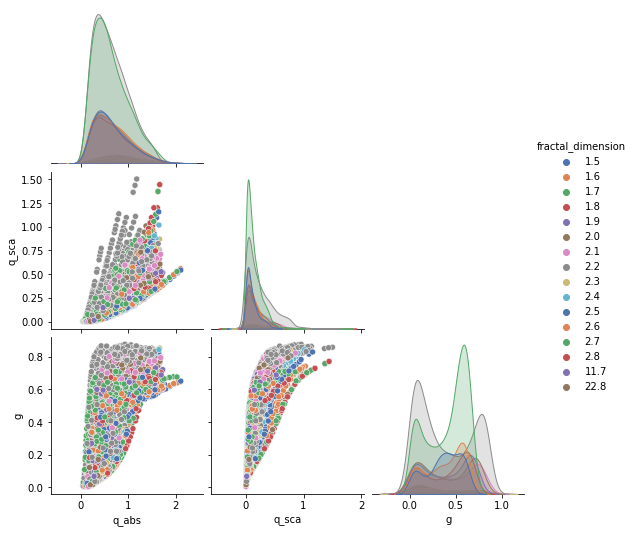

In [118]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

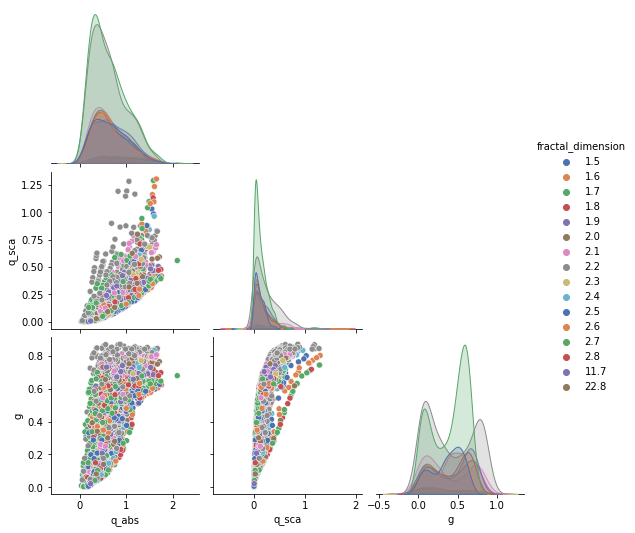

In [119]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

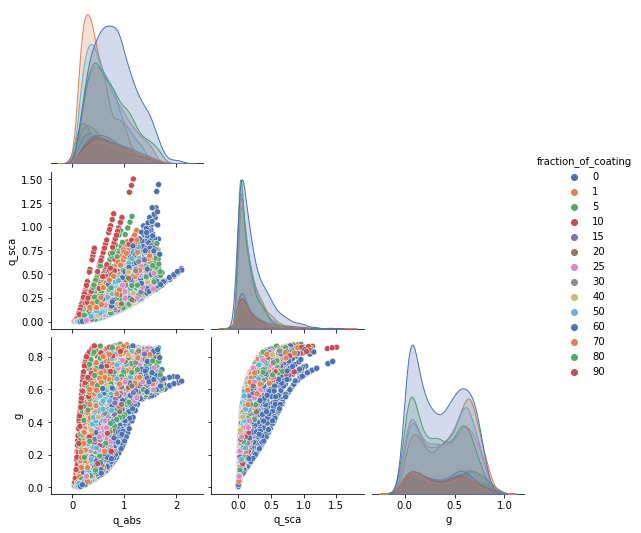

In [120]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

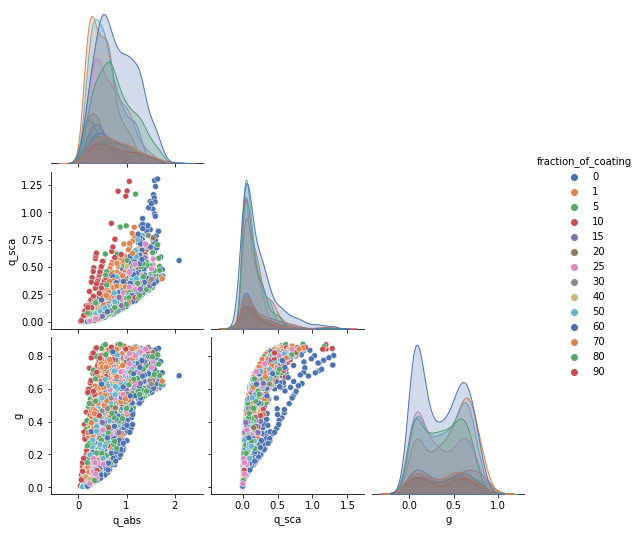

In [122]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

In [66]:
# Leaving random part of dataset out (q_abs)


In [56]:
# Y = df.iloc[:,25:26]
# X = df.iloc[:,:8]
# X_train, X_test, y_train, y_test = train_test_split(
#         X, Y, 
#         test_size=0.25, 
#         random_state=42)
# y_train.head()

q_abs
9452  0.66590
5107  0.12237
6556  1.18420
3443  0.51042
5640  1.32180

In [57]:
# parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
#             'kernel':['rbf'],
#             'gamma':[0, 0.5,1]}]

In [58]:
# #array_var=generate_default_kernel_ridge_model(X,Y)
# scaling_x=StandardScaler()
# scaling_y=StandardScaler()
# X_train=scaling_x.fit_transform(X_train)
# X_test=scaling_x.transform(X_test)
# y_train=scaling_y.fit_transform(y_train)
# #Y_test=scaling_y.transform(Y_test)

# regressor= KernelRidge()
# model=regressor.fit(X_train,y_train)
# grid_search=GridSearchCV(estimator=model,
#                         param_grid=parameters,
#                          cv=2,
#                          scoring='neg_mean_absolute_percentage_error',
#                         n_jobs=-1
#                         )
# grid_search= grid_search.fit(X_train, y_train)
# print('Best score in CV: ', grid_search.best_score_)
# print('Best parameters in CV: ', grid_search.best_params_)
# #grid_search=grid_search_cv(parameters, model, X_train, Y_train)

# parameter_alpha=grid_search.best_params_['alpha']
# parameter_kernel=grid_search.best_params_['kernel']
# parameter_gamma=grid_search.best_params_['gamma']

# regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
# #wrapper=MultiOutputRegressor(regressor)
# model=regressor.fit(X_train,y_train)
#     #wrapper.fit(X_train, Y_train)

# y_pred=model.predict(X_test)
# #Y_pred=wrapper.predict(X_test)
    
# y_pred=scaling_y.inverse_transform(y_pred)

# error= mean_absolute_percentage_error(y_test, y_pred, multioutput='raw_values')   


# #error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
# print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -0.0865849973083315
Best parameters in CV:  {'alpha': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.01078357]


In [ ]:
# Leaving random part of dataset out (q_sca)

In [59]:
# Y = df.iloc[:,26:27]
# X = df.iloc[:,:8]
# X_train, X_test, y_train, y_test = train_test_split(
#         X, Y, 
#         test_size=0.25, 
#         random_state=42)
# y_train.head()

q_sca
9452  0.315910
5107  0.001299
6556  0.456070
3443  0.037226
5640  0.549850

In [60]:
# parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
#             'kernel':['rbf'],
#             'gamma':[0, 0.5,1]}]

In [61]:
# #array_var=generate_default_kernel_ridge_model(X,Y)
# scaling_x=StandardScaler()
# scaling_y=StandardScaler()
# X_train=scaling_x.fit_transform(X_train)
# X_test=scaling_x.transform(X_test)
# y_train=scaling_y.fit_transform(y_train)
# #Y_test=scaling_y.transform(Y_test)

# regressor= KernelRidge()
# model=regressor.fit(X_train,y_train)
# grid_search=GridSearchCV(estimator=model,
#                         param_grid=parameters,
#                          cv=2,
#                          scoring='neg_mean_absolute_percentage_error',
#                         n_jobs=-1
#                         )
# grid_search= grid_search.fit(X_train, y_train)
# print('Best score in CV: ', grid_search.best_score_)
# print('Best parameters in CV: ', grid_search.best_params_)
# #grid_search=grid_search_cv(parameters, model, X_train, Y_train)

# parameter_alpha=grid_search.best_params_['alpha']
# parameter_kernel=grid_search.best_params_['kernel']
# parameter_gamma=grid_search.best_params_['gamma']

# regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
# #wrapper=MultiOutputRegressor(regressor)
# model=regressor.fit(X_train,y_train)
#     #wrapper.fit(X_train, Y_train)

# y_pred=model.predict(X_test)
# #Y_pred=wrapper.predict(X_test)
    
# y_pred=scaling_y.inverse_transform(y_pred)

# error= mean_absolute_percentage_error(y_test, y_pred, multioutput='raw_values')   


# #error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
# print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -0.10211410764819293
Best parameters in CV:  {'alpha': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.02236088]


In [ ]:
# Leaving random part of dataset out (g)

In [67]:
# Y = df.iloc[:,27:28]
# X = df.iloc[:,:8]
# X_train, X_test, y_train, y_test = train_test_split(
#         X, Y, 
#         test_size=0.25, 
#         random_state=42)
# y_train.head()

g
9452  0.62217
5107  0.00668
6556  0.71004
3443  0.26509
5640  0.79177

In [68]:
# parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
#             'kernel':['rbf'],
#             'gamma':[0, 0.5,1]}]

In [69]:
# #array_var=generate_default_kernel_ridge_model(X,Y)
# scaling_x=StandardScaler()
# scaling_y=StandardScaler()
# X_train=scaling_x.fit_transform(X_train)
# X_test=scaling_x.transform(X_test)
# y_train=scaling_y.fit_transform(y_train)
# #Y_test=scaling_y.transform(Y_test)

# regressor= KernelRidge()
# model=regressor.fit(X_train,y_train)
# grid_search=GridSearchCV(estimator=model,
#                         param_grid=parameters,
#                          cv=2,
#                          scoring='neg_mean_absolute_percentage_error',
#                         n_jobs=-1
#                         )
# grid_search= grid_search.fit(X_train, y_train)
# print('Best score in CV: ', grid_search.best_score_)
# print('Best parameters in CV: ', grid_search.best_params_)
# #grid_search=grid_search_cv(parameters, model, X_train, Y_train)

# parameter_alpha=grid_search.best_params_['alpha']
# parameter_kernel=grid_search.best_params_['kernel']
# parameter_gamma=grid_search.best_params_['gamma']

# regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
# #wrapper=MultiOutputRegressor(regressor)
# model=regressor.fit(X_train,y_train)
#     #wrapper.fit(X_train, Y_train)

# y_pred=model.predict(X_test)
# #Y_pred=wrapper.predict(X_test)
    
# y_pred=scaling_y.inverse_transform(y_pred)

# error= mean_absolute_percentage_error(y_test, y_pred, multioutput='raw_values')   


# #error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
# print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -0.19978701400544546
Best parameters in CV:  {'alpha': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.02909106]


# Calculating remaining optical properties

In [104]:
def calculate_dependent_optical_properties(q_abs, q_sca, g, vol_equi_radius_outer, mass_bc, mass_organics, mass_total):
    q_ext=q_abs+q_sca
    c_geo=(math.pi)*((vol_equi_radius_outer)**2)
    c_ext= q_ext*c_geo*
    c_abs= q_abs*c_geo*10e-7
    c_sca= q_sca*c_geo*10e-7
    ssa=q_sca/q_ext
    mac_bc=c_abs*10e-13/mass_bc
    mac_organics=c_abs*10e-12/mass_organics
    mac_total=c_abs*10e-13/mass_total

    
    optical_all={
        'q_ext': q_ext,
        'q_abs':q_abs,
        'q_sca':q_sca,
        'g': g,
        'c_geo': c_geo,
        'c_ext': c_ext,
        'c_abs': c_abs,
        'c_sca': c_sca,
        'ssa': ssa,
        'mac_total':mac_total,
        'mac_organics': mac_organics,
        'mac_bc': mac_bc
    }
    return optical_all

In [42]:
Y = df.iloc[:,24:]
X = df.iloc[:,:24]
#print(X.head())
X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, 
        test_size=0.25, 
        random_state=42)


In [46]:

Y_train_features=Y_train.iloc[:,1:4]
X_train_features = X_train.iloc[:,:8]

Y_test_features=Y_test.iloc[:,1:4]
X_test_features = X_test.iloc[:,:8]

scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train_features=scaling_x.fit_transform(X_train_features)
X_test_features=scaling_x.transform(X_test_features)
Y_train_features=scaling_y.fit_transform(Y_train_features)

regressor=KernelRidge(alpha= 0.0001, kernel='rbf', gamma=1)
    
wrapper=MultiOutputRegressor(regressor)
    
    #model=regressor.fit(X_train,Y_train)
wrapper.fit(X_train_features, Y_train_features)

    #Y_pred=model.predict(X_test)
Y_pred_features=wrapper.predict(X_test_features)
    
Y_pred_features=scaling_y.inverse_transform(Y_pred_features)




array([[1.13765005, 0.31543298, 0.62253828],
       [0.44526496, 0.27563726, 0.70829572],
       [0.57716551, 0.05728544, 0.17186893],
       ...,
       [1.27274114, 0.25183712, 0.56776192],
       [1.06178332, 0.31620977, 0.75234468],
       [1.32138129, 0.59871472, 0.76230745]])

In [122]:
X_test=X_test.reset_index(drop=True)
X_test

wavelength  fractal_dimension  fraction_of_coating  \
0            467                1.9                    0   
1            530                2.2                   80   
2            467                1.8                    5   
3            467                1.7                   25   
4            660                1.8                   25   
...          ...                ...                  ...   
2452         467                1.6                    5   
2453         660                2.2                   90   
2454         530                1.6                    5   
2455         660                2.0                   25   
2456         530                2.3                    0   

      primary_particle_size  number_of_primary_particles  \
0                      15.0                          190   
1                      25.6                           95   
2                      15.3                           18   
3                      16.5                          225   
4                      16.5                          250   
...                     ...                          ...   
2452                   15.3                           95   
2453                   30.0                          350   
2454                   15.3                          400   
2455                   16.5                          800   
2456                   15.0                          450   

      vol_equi_radius_outer  vol_equi_radius_inner  equi_mobility_dia  \
0                 86.233456              86.233456         346.163353   
1                116.810307              68.443540         414.862803   
2                 40.097343              39.311121         106.146554   
3                100.356333              91.233030         415.071125   
4                103.943487              94.494079         437.984601   
...                     ...                    ...                ...   
2452              69.812410              68.443540         247.945347   
2453             211.418962             105.709481         945.412741   
2454             112.731364             110.520945         516.140003   
2455             153.172431             139.247665         792.657058   
2456             114.946415             114.946415         537.347378   

      mie_epsilon  length_scale_factor  ...  volume_total     volume_bc  \
0               2             0.134544  ...  2.686062e+06  2.686062e+06   
1               2             0.118551  ...  6.676243e+06  1.343031e+06   
2               2             0.134544  ...  2.700445e+05  2.544690e+05   
3               2             0.134544  ...  4.233728e+06  3.180863e+06   
4               2             0.095200  ...  4.704142e+06  3.534292e+06   
...           ...                  ...  ...           ...           ...   
2452            2             0.134544  ...  1.425235e+06  1.343031e+06   
2453            2             0.095200  ...  3.958407e+07  4.948008e+06   
2454            2             0.118551  ...  6.000990e+06  5.654867e+06   
2455            2             0.095200  ...  1.505326e+07  1.130973e+07   
2456            2             0.118551  ...  6.361725e+06  6.361725e+06   

      volume_organics  density_bc  density_organics       mass_bc  \
0        0.000000e+00         1.5               1.1  4.029090e-15   
1        5.333212e+06         1.5               1.1  2.014550e-15   
2        1.557554e+04         1.5               1.1  3.817040e-16   
3        1.052866e+06         1.5               1.1  4.771290e-15   
4        1.169851e+06         1.5               1.1  5.301440e-15   
...               ...         ...               ...           ...   
2452     8.220423e+04         1.5               1.1  2.014550e-15   
2453     3.463606e+07         1.5               1.1  7.422010e-15   
2454     3.461231e+05         1.5               1.1  8.482300e-15   
2455     3.743522e+06         1.5               1.1  1.696460e-14   
2456     0.000000e+00      

In [48]:
predicted_y_features=pd.DataFrame(Y_pred_features, columns=["q_abs", "q_sca", "g"])
predicted_y_features

q_abs     q_sca         g
0     1.137650  0.315433  0.622538
1     0.445265  0.275637  0.708296
2     0.577166  0.057285  0.171869
3     1.233863  0.285980  0.614051
4     0.730723  0.128643  0.606940
...        ...       ...       ...
2452  0.997771  0.162970  0.478116
2453  0.308241  0.445723  0.807850
2454  1.272741  0.251837  0.567762
2455  1.061783  0.316210  0.752345
2456  1.321381  0.598715  0.762307

[2457 rows x 3 columns]

In [124]:
predicted_optical_all=calculate_dependent_optical_properties(predicted_y_features['q_abs'], predicted_y_features['q_sca'],  predicted_y_features['g'], X_test['vol_equi_radius_outer'], X_test['mass_bc'], X_test['mass_organics'], X_test['mass_total'])
predicted_optical_properties=pd.DataFrame.from_dict(predicted_optical_all)
predicted_optical_properties

q_ext     q_abs     q_sca         g          c_geo     c_ext  \
0     1.453083  1.137650  0.315433  0.622538   23361.539454  0.033946   
1     0.720902  0.445265  0.275637  0.708296   42865.925724  0.030902   
2     0.634451  0.577166  0.057285  0.171869    5051.043062  0.003205   
3     1.519842  1.233863  0.285980  0.614051   31640.215998  0.048088   
4     0.859366  0.730723  0.128643  0.606940   33942.547422  0.029169   
...        ...       ...       ...       ...            ...       ...   
2452  1.160741  0.997771  0.162970  0.478116   15311.408304  0.017773   
2453  0.753964  0.308241  0.445723  0.807850  140422.837723  0.105874   
2454  1.524578  1.272741  0.251837  0.567762   39924.491693  0.060868   
2455  1.377993  1.061783  0.316210  0.752345   73707.398953  0.101568   
2456  1.920096  1.321381  0.598715  0.762307   41508.853076  0.079701   

         c_abs     c_sca       ssa  mac_total  mac_organics    mac_bc  
0     0.026577  0.007369  0.217078   6.596342           inf  6.596342  
1     0.019087  0.011815  0.382350   2.421837      3.253490  9.474421  
2     0.002915  0.000289  0.090291   7.309472    170.155305  7.637562  
3     0.039040  0.009048  0.188164   6.584032     33.708664  8.182208  
4     0.024803  0.004366  0.149695   3.764660     19.274034  4.678464  
...        ...       ...       ...        ...           ...       ...  
2452  0.015277  0.002495  0.140402   7.257715    168.950220  7.583467  
2453  0.043284  0.062590  0.591173   0.950844      1.136073  5.831848  
2454  0.050814  0.010054  0.165185   5.733196    133.461707  5.990538  
2455  0.078261  0.023307  0.229471   3.712145     19.005283  4.613211  
2456  0.054849  0.024852  0.311815   5.747813           inf  5.747813  

[2457 rows x 12 columns]

# Leave fractal dimesnion: =2.2 as test set

In [131]:
train_set=df[(df['fractal_dimension']<=2.1) | (df['fractal_dimension']>2.2)]
test_set=df[df['fractal_dimension']==2.2]
test_set.shape

(2195, 36)

In [80]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [81]:
parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [82]:

#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -1.1131582243789473
Best parameters in CV:  {'alpha': 0.001, 'gamma': 1, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.02084082 0.09594194 0.1088999 ]


# Considering test data with only fractal dimesion = 2.2 and using KRR, with parameters  {'alpha': 0.001, 'gamma': 1, 'kernel': 'rbf'}, mean absolute percentage error of 3 output variables should be approximately [2.08%  9.5% 10.88%] for q_abs, q_sca, g respectively

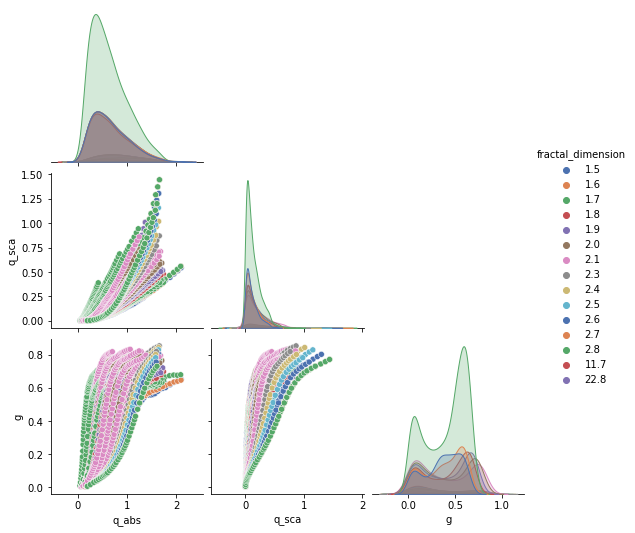

In [132]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

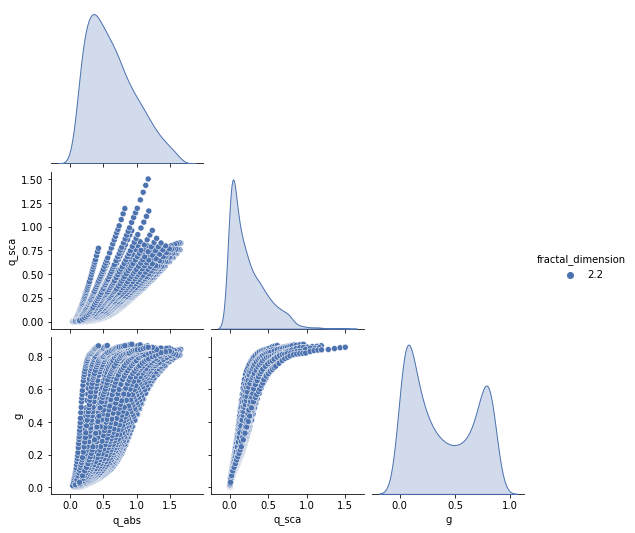

In [133]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

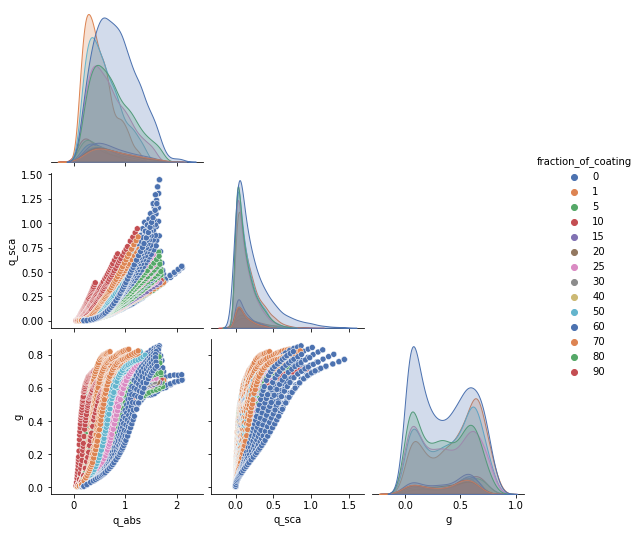

In [134]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

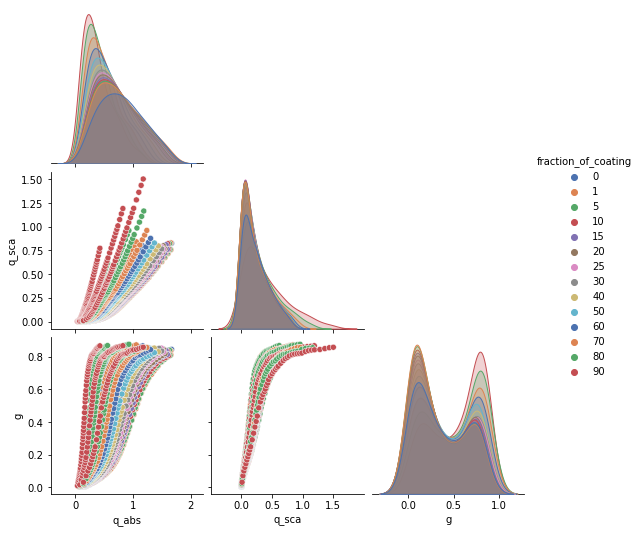

In [135]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

# Leave fractal dimesnion: =2.1, 2.2 as test set

In [136]:
train_set=df[(df['fractal_dimension']<2.1) | (df['fractal_dimension']>2.2)]
test_set=df[(df['fractal_dimension']==2.1) | (df['fractal_dimension']==2.2)]
test_set.shape

(2968, 36)

In [4]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [6]:
parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [7]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -1.4717110966489435
Best parameters in CV:  {'alpha': 0.001, 'gamma': 1, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.0202619  0.10223092 0.14807566]


# Considering test data with only fractal dimesion = 2.1, 2.2 and using KRR, with parameters  {'alpha': 0.001, 'gamma': 1, 'kernel': 'rbf'}, mean absolute percentage error of 3 output variables should be approximately [2.02%  10.22% 14.80%] for q_abs, q_sca, g respectively

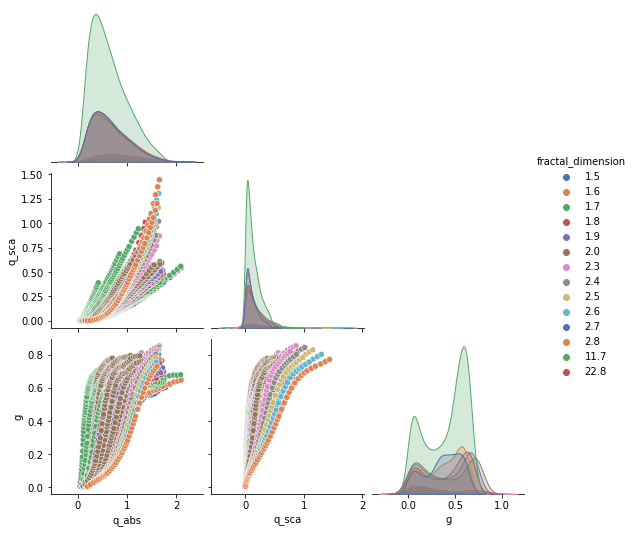

In [137]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

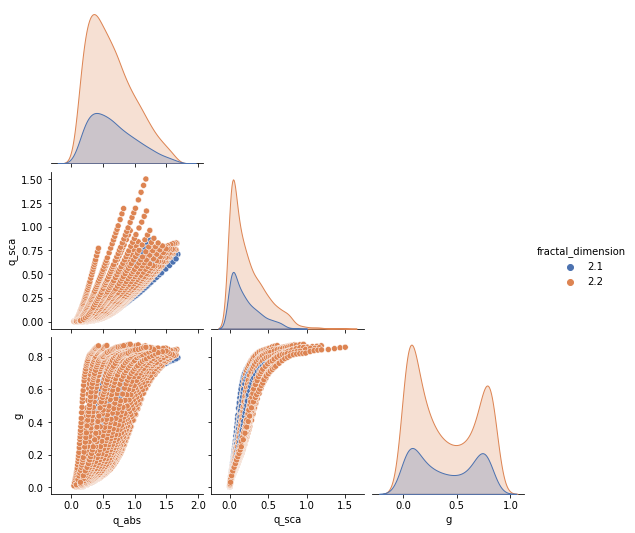

In [138]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

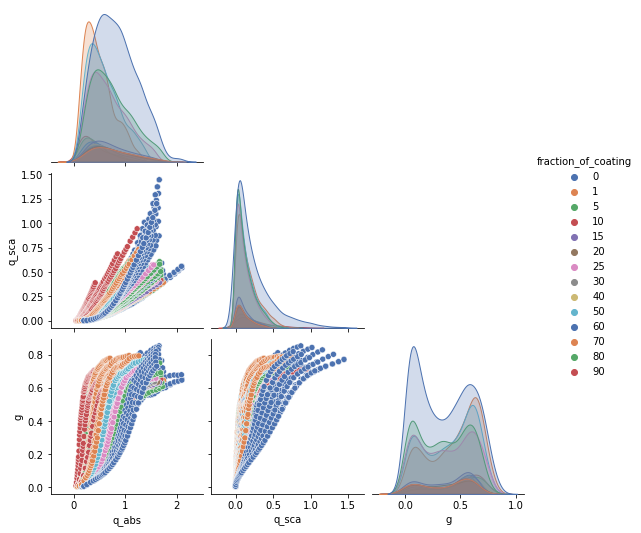

In [139]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

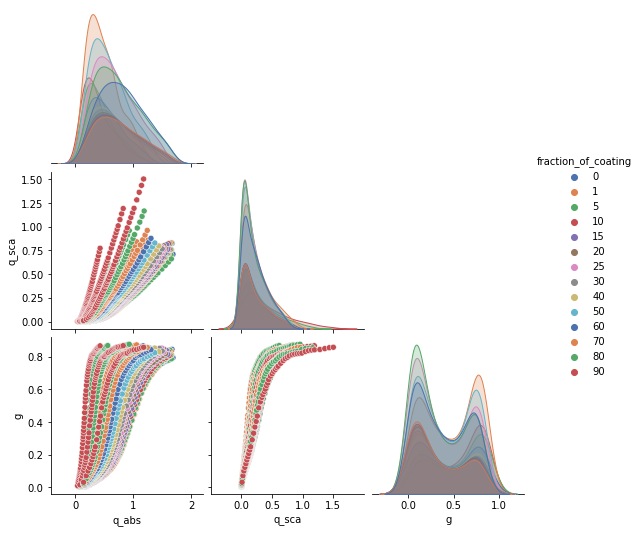

In [140]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

# Leave fractal dimesnion: =2.1, 2.2, 2.3 as test set

In [141]:
train_set=df[(df['fractal_dimension']<2.1) | (df['fractal_dimension']>2.3)]
test_set=df[(df['fractal_dimension']>=2.1) & (df['fractal_dimension']<=2.3)]
test_set.shape

(3109, 36)

In [128]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [129]:
parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [130]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -1.4305731457234283
Best parameters in CV:  {'alpha': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.0281036  0.26439706 0.20263671]


# Considering test data with only fractal dimesion = 2.1, 2.2, 2.3 and using KRR, with parameters  {'alpha': 0.1, 'gamma': 1, 'kernel': 'rbf'}, mean absolute percentage error of 3 output variables should be approximately [2.81%  26.43% 20.26%] for q_abs, q_sca, g respectively

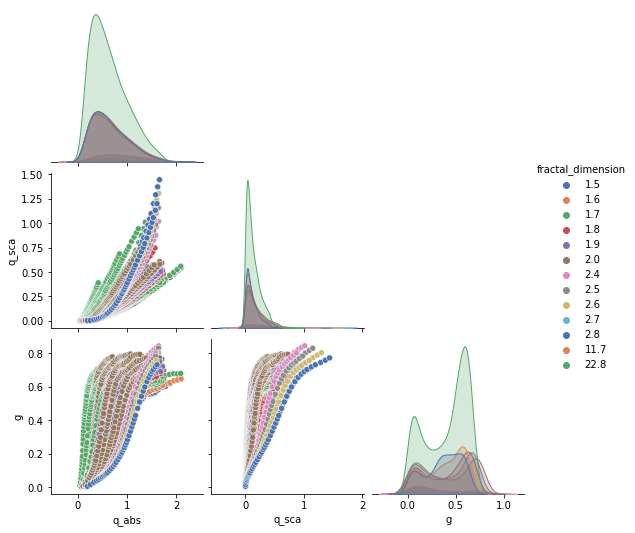

In [142]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

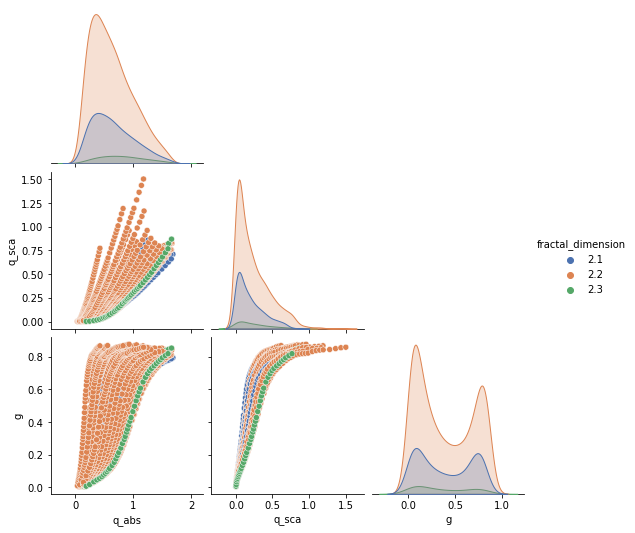

In [143]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

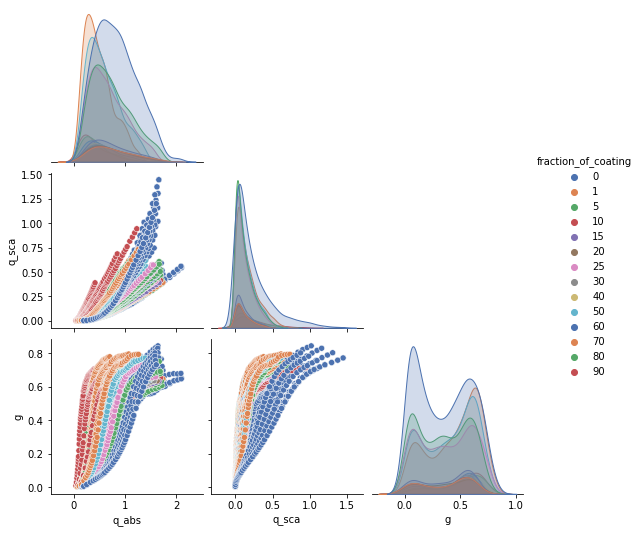

In [144]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

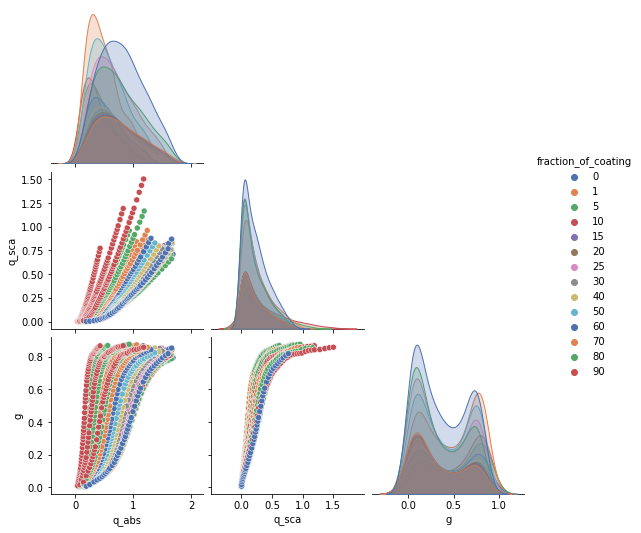

In [145]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

# Leave fractal dimesnion: =2.0,2.1,2.2,2.3 as test set

In [146]:
train_set=df[(df['fractal_dimension']<2.0) | (df['fractal_dimension']>2.3)]
test_set=df[(df['fractal_dimension']>=2.0) & (df['fractal_dimension']<=2.3)]
test_set.shape

(3882, 36)

In [147]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [148]:
parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [149]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -1.2551926868104042
Best parameters in CV:  {'alpha': 0.0001, 'gamma': 0.5, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.02285328 0.08552287 0.23298601]


# Considering test data with only fractal dimesion = 2.0, 2.1, 2.2, 2.3 and using KRR, with parameters  {'alpha': 0.0001, 'gamma': 0.5, 'kernel': 'rbf'}, mean absolute percentage error of 3 output variables should be approximately [2.28%  8.55% 23.29%] for q_abs, q_sca, g respectively

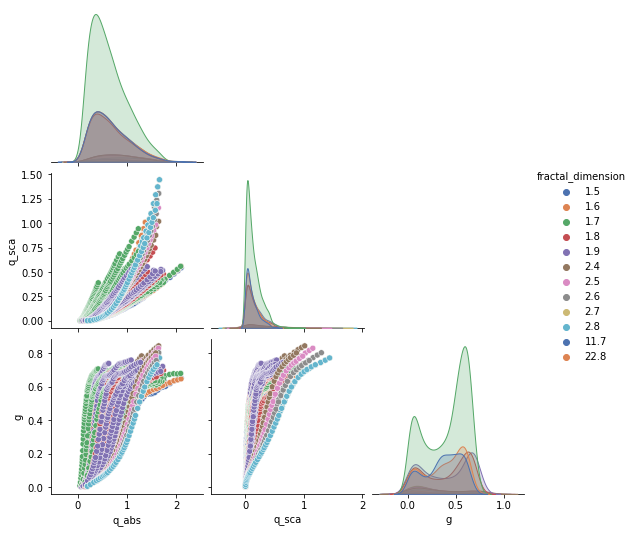

In [150]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

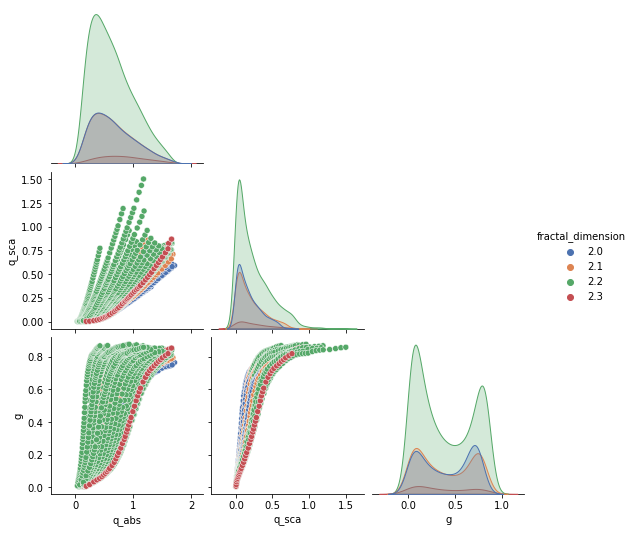

In [151]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

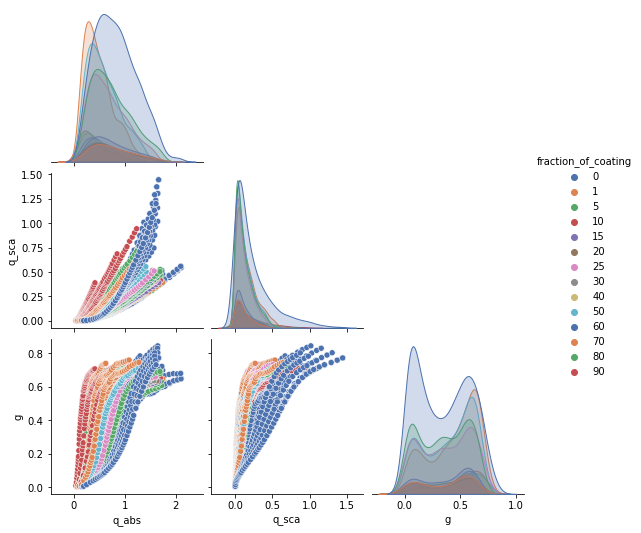

In [152]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

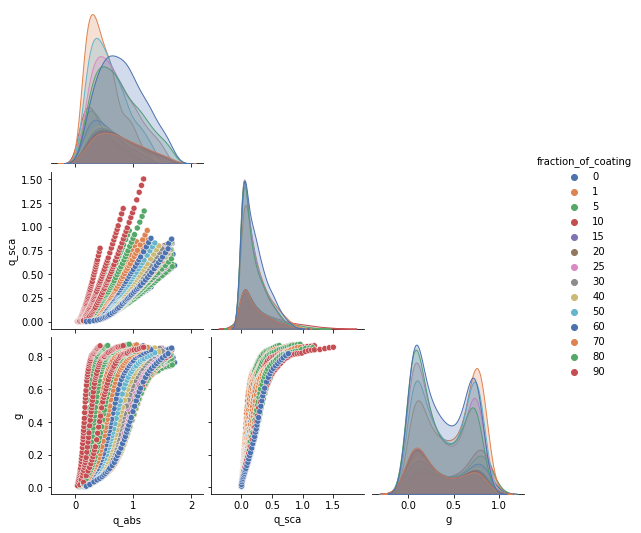

In [153]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

# Leave fractal dimesnion: =2.0,2.1,2.2,2.3, 2.4 as test set

In [154]:
train_set=df[(df['fractal_dimension']<2.0) | (df['fractal_dimension']>2.4)]
test_set=df[(df['fractal_dimension']>=2.0) & (df['fractal_dimension']<=2.4)]
test_set.shape

(4023, 36)

In [155]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

In [156]:
parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [157]:
#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -1.0386373650015637
Best parameters in CV:  {'alpha': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.02715442 0.27515674 0.23923646]


# Considering test data with only fractal dimesion = 2.0, 2.1, 2.2, 2.3, 2.4 and using KRR, with parameters  {'alpha': 0.1, 'gamma': 1, 'kernel': 'rbf'}, mean absolute percentage error of 3 output variables should be approximately [2.71%  27.51% 23.92%] for q_abs, q_sca, g respectively

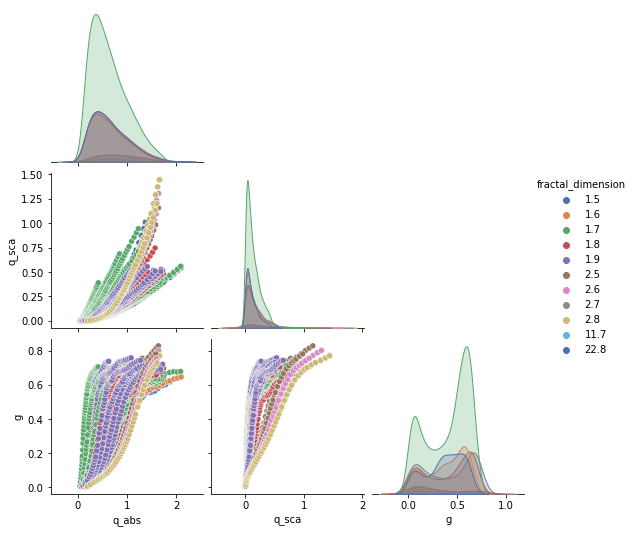

In [158]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

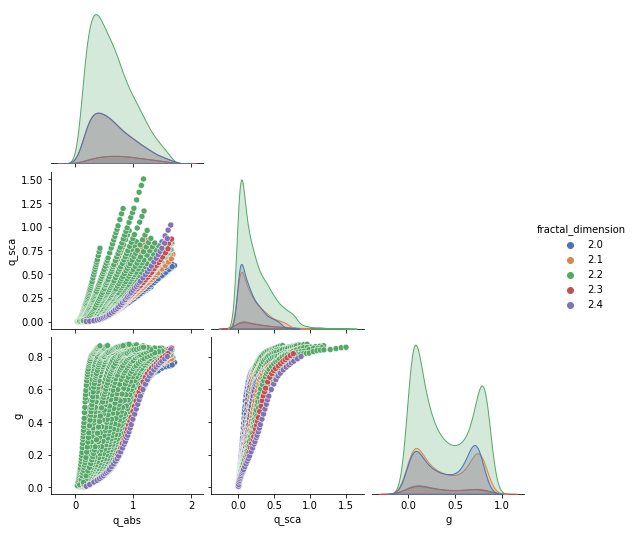

In [159]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fractal_dimension", palette="deep", corner=True)

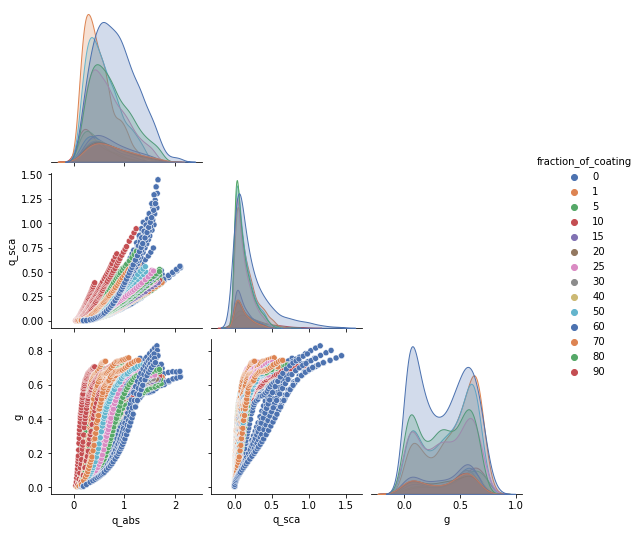

In [160]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

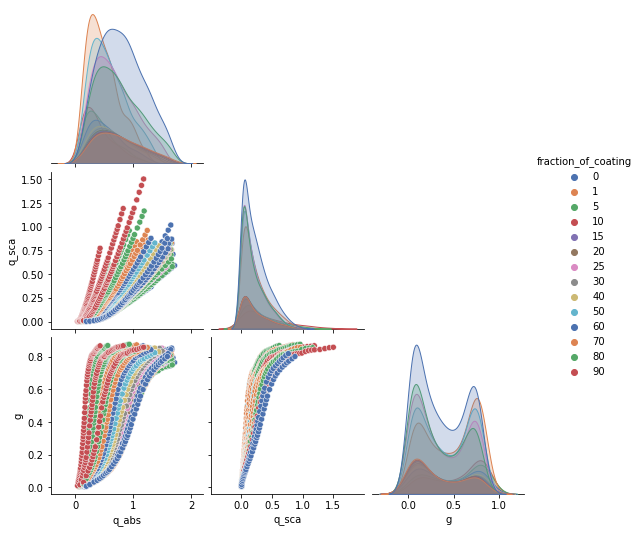

In [161]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

# Leave fraction of coating: ==50 as test set

In [170]:
train_set=df[(df['fraction_of_coating']<=40) | (df['fraction_of_coating']>50)]
test_set=df[df['fraction_of_coating']==50]
test_set.shape


(1264, 36)

In [173]:

parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [176]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)

grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -1.3565430276194639
Best parameters in CV:  {'alpha': 0.01, 'gamma': 1, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.01712927 0.12712033 0.12401284]


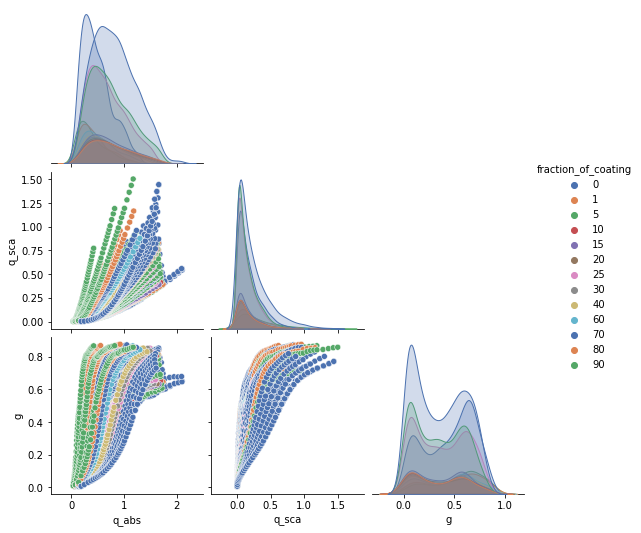

In [164]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

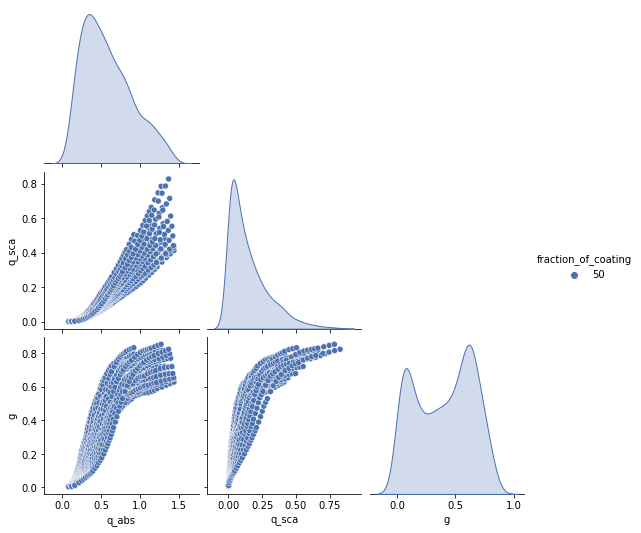

In [165]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

# Considering test data with only fraction_of_coating = 50 and using KRR, with parameters  {'alpha': 0.01, 'gamma': 1, 'kernel': 'rbf'}, mean absolute percentage error of 3 output variables should be approximately [1.71%  12.71% 12.4%] for q_abs, q_sca, g respectively

# Leave fraction of coating: ==40, 50 as test set

In [178]:
train_set=df[(df['fraction_of_coating']<40) | (df['fraction_of_coating']>50)]
test_set=df[(df['fraction_of_coating']==40) | (df['fraction_of_coating']==50)]
test_set.shape


(1580, 36)

In [179]:

parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [180]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)

grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -1.0936047040335464
Best parameters in CV:  {'alpha': 0.001, 'gamma': 1, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.01823123 0.19799116 0.41734371]


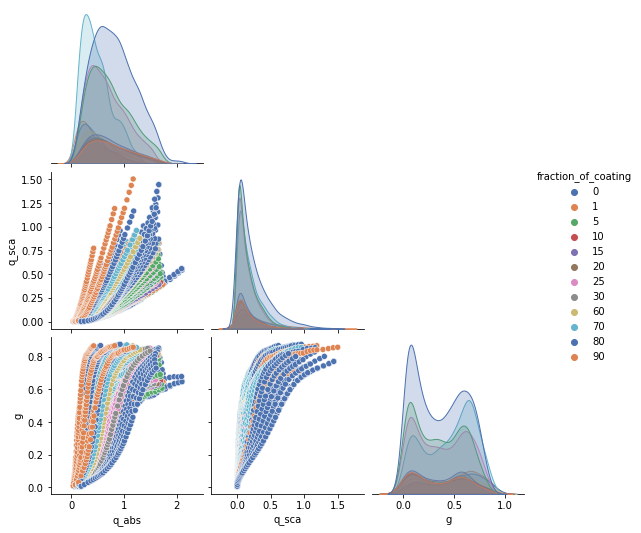

In [181]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

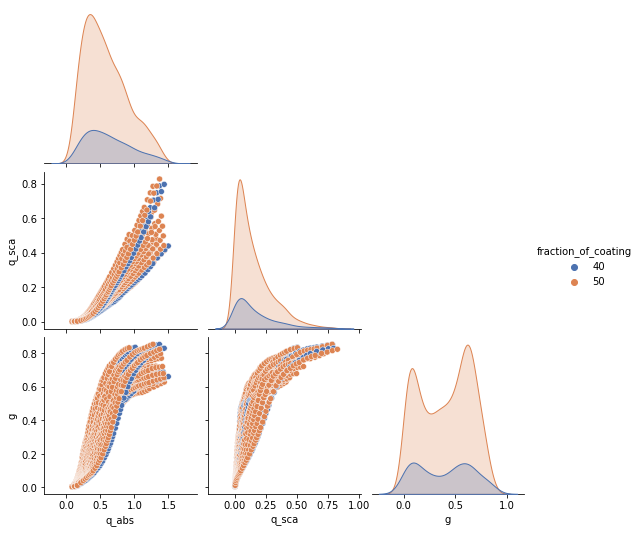

In [182]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

# Considering test data with only fraction_of_coating = 40, 50 and using KRR, with parameters  {'alpha': 0.01, 'gamma': 1, 'kernel': 'rbf'}, mean absolute percentage error of 3 output variables should be approximately [1.82%  19.79% 41.73%] for q_abs, q_sca, g respectively

# Leave fraction of coating: ==40, 50, 60 as test set

In [184]:
train_set=df[(df['fraction_of_coating']<40) | (df['fraction_of_coating']>60)]
test_set=df[(df['fraction_of_coating']>=40) & (df['fraction_of_coating']<=60)]
test_set.shape


(1896, 36)

In [185]:

parameters=[{'alpha':[0, 0.0001, 0.001, 0.01, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.5,1]}]

In [186]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)

grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -1.1671618980689802
Best parameters in CV:  {'alpha': 0.001, 'gamma': 1, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.09467849 1.10141405 0.65915066]


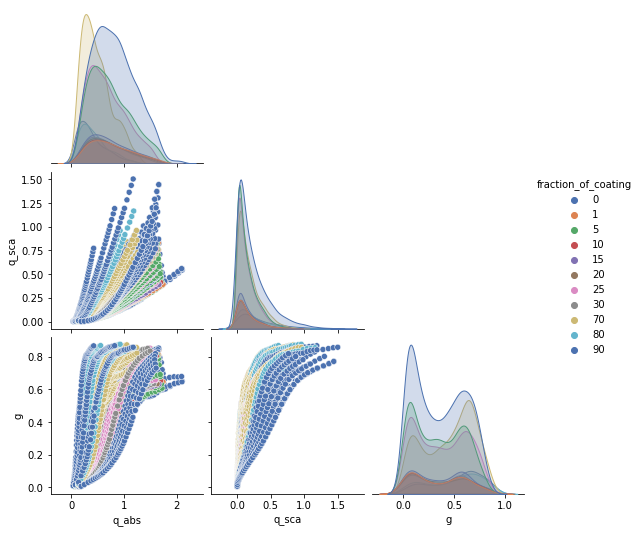

In [187]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

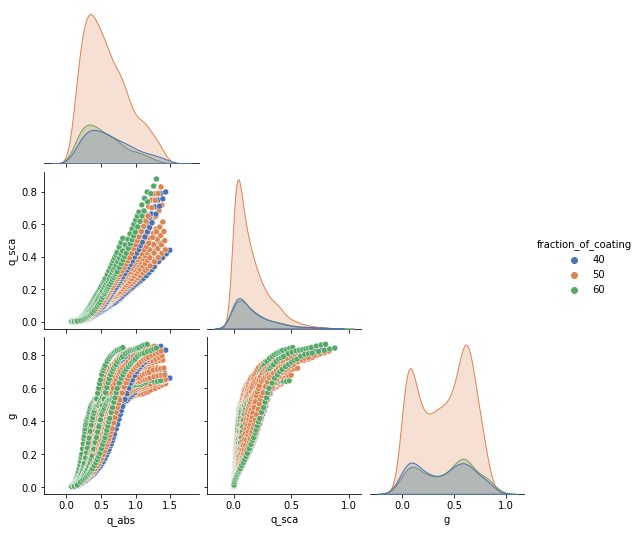

In [188]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="fraction_of_coating", palette="deep", corner=True)

# Leave wavelength = 467 out


In [189]:
train_set=df[df['wavelength']>467]
test_set=df[df['wavelength']==467]
test_set.shape

(3014, 36)

In [190]:

parameters=[{'alpha':[0.0001, 0.001, 0.1],
            'kernel':['rbf'],
            'gamma':[1, 5, 10]}]

In [191]:
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

#array_var=generate_default_kernel_ridge_model(X,Y)
scaling_x=StandardScaler()
scaling_y=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
Y_train=scaling_y.fit_transform(Y_train)
#Y_test=scaling_y.transform(Y_test)

regressor= KernelRidge()
model=regressor.fit(X_train,Y_train)

grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_percentage_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train, Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']

regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
#wrapper=MultiOutputRegressor(regressor)
model=regressor.fit(X_train,Y_train)
    #wrapper.fit(X_train, Y_train)

Y_pred=model.predict(X_test)
#Y_pred=wrapper.predict(X_test)
    
Y_pred=scaling_y.inverse_transform(Y_pred)

error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')   


#error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -0.9989453715679059
Best parameters in CV:  {'alpha': 0.0001, 'gamma': 5, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.4571647  3.84703038 2.22804201]


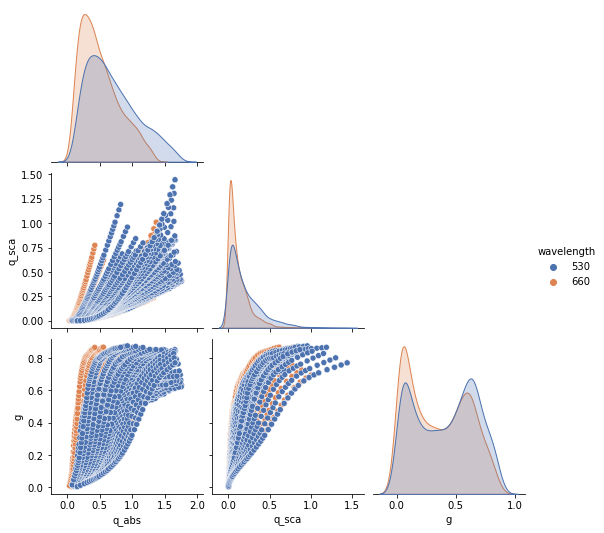

In [192]:
sns.pairplot(train_set, vars=['q_abs', 'q_sca', 'g'], hue="wavelength", palette="deep", corner=True)

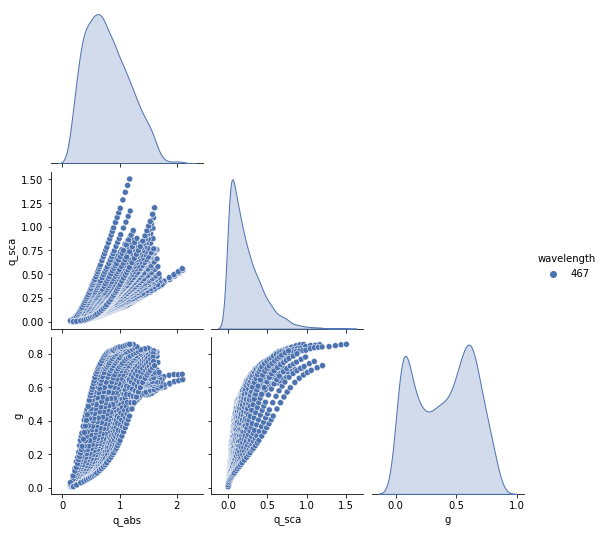

In [193]:
sns.pairplot(test_set, vars=['q_abs', 'q_sca', 'g'], hue="wavelength", palette="deep", corner=True)

In [ ]:
# Leave fractal dimesnion: ==  2.8 as test set

In [8]:
# train_set=df[(df['fractal_dimension']<=2.7) | (df['fractal_dimension']>=11)]
# test_set=df[df['fractal_dimension']==2.8]
# test_set.shape

(92, 36)

In [7]:
# Y_train = train_set.iloc[:,25:28]
# X_train = train_set.iloc[:,:8]
# Y_test = test_set.iloc[:,25:28]
# X_test = test_set.iloc[:,:8]
# Y_test.head()

q_abs     q_sca         g
6764  0.15654  0.000930  0.005690
6765  0.20533  0.002392  0.013693
6766  0.26387  0.005929  0.024223
6767  0.30759  0.010165  0.031153
6768  0.34084  0.014830  0.037551

In [5]:
# parameters=[{'alpha':[0, 0.0001, 0.001, 0.1, 1],
#             'kernel':['rbf'],
#             'gamma':[0,1, 10, 100]}]

In [9]:
# #array_var=generate_default_kernel_ridge_model(X,Y)
# scaling_x=StandardScaler()
# scaling_y=StandardScaler()
# X_train=scaling_x.fit_transform(X_train)
# X_test=scaling_x.transform(X_test)
# Y_train=scaling_y.fit_transform(Y_train)
# #Y_test=scaling_y.transform(Y_test)

# regressor= KernelRidge()
# #model=regressor.fit(X_train,Y_train)
# grid_search=grid_search_cv(parameters, regressor, X_train, Y_train)

# parameter_alpha=grid_search.best_params_['alpha']
# parameter_kernel=grid_search.best_params_['kernel']
# parameter_gamma=grid_search.best_params_['gamma']

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel, parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
# print('Mean absolute percentage error on test set: ', error)


Best score in CV:  -0.9744756530512584
Best parameters in CV:  {'alpha': 0.1, 'gamma': 100, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [0.19898543 2.72745065 1.59866281]


In [ ]:
# Leave fraction of coating: ==80, 90 as test set

In [57]:
# train_set=df[df['fraction_of_coating']<=70]
# test_set=df[df['fraction_of_coating']>=80]
# train_set.shape


(9196, 36)

In [58]:

# Y_train = train_set.iloc[:,25:28]
# X_train = train_set.iloc[:,:8]
# Y_test = test_set.iloc[:,25:28]
# X_test = test_set.iloc[:,:8]

# #array_var=generate_default_kernel_ridge_model(X,Y)
# scaling_x=StandardScaler()
# scaling_y=StandardScaler()
# X_train=scaling_x.fit_transform(X_train)
# X_test=scaling_x.transform(X_test)
# Y_train=scaling_y.fit_transform(Y_train)
# #Y_test=scaling_y.transform(Y_test)

# regressor= KernelRidge()
# #model=regressor.fit(X_train,Y_train)
# grid_search=grid_search_cv(parameters, regressor, X_train, Y_train)

# parameter_alpha=grid_search.best_params_['alpha']
# parameter_kernel=grid_search.best_params_['kernel']
# parameter_gamma=grid_search.best_params_['gamma']

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel, parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
# print('Mean absolute percentage error on test set: ', error)

Best score in CV:  -0.96436185024248
Best parameters in CV:  {'alpha': 0.0001, 'gamma': 100, 'kernel': 'rbf'}
Mean absolute percentage error on test set:  [1.74355348 3.37444507 1.43679927]


In [ ]:
# Leave wavelength = 467 out

In [6]:
# train_set=df[df['wavelength']>467]
# test_set=df[df['wavelength']==467]
# test_set.shape

(3014, 36)

In [7]:

# Y_train = train_set.iloc[:,25:28]
# X_train = train_set.iloc[:,:8]
# Y_test = test_set.iloc[:,25:28]
# X_test = test_set.iloc[:,:8]

# #array_var=generate_default_kernel_ridge_model(X,Y)
# scaling_x=StandardScaler()
# scaling_y=StandardScaler()
# X_train=scaling_x.fit_transform(X_train)
# X_test=scaling_x.transform(X_test)
# Y_train=scaling_y.fit_transform(Y_train)
# #Y_test=scaling_y.transform(Y_test)

# regressor= KernelRidge()
# #model=regressor.fit(X_train,Y_train)
# grid_search=grid_search_cv(parameters, regressor, X_train, Y_train)

# parameter_alpha=grid_search.best_params_['alpha']
# parameter_kernel=grid_search.best_params_['kernel']
# parameter_gamma=grid_search.best_params_['gamma']

# regressor=KernelRidge(alpha= parameter_alpha, kernel=parameter_kernel, gamma=parameter_gamma)
    
# wrapper=MultiOutputRegressor(regressor)
    
#     #model=regressor.fit(X_train,Y_train)
# wrapper.fit(X_train, Y_train)

#     #Y_pred=model.predict(X_test)
# Y_pred=wrapper.predict(X_test)
    
# Y_pred=scaling_y.inverse_transform(Y_pred)


Best score in CV:  -0.9993877181459276
Best parameters in CV:  {'alpha': 0.0001, 'gamma': 10, 'kernel': 'rbf'}


In [8]:

# mape_error= mean_absolute_percentage_error(Y_test, Y_pred, multioutput='raw_values')
# rmse= mean_squared_error(Y_test, Y_pred, multioutput='raw_values', squared=False)
    

# print('Mean absolute percentage error on test set: ', mape_error)
# rmse

Mean absolute percentage error on test set:  [0.46084883 3.88224472 2.2488797 ]


array([0.42033088, 0.22201353, 0.24427546])

When  fractal dimension(Boundary value) or fraction of coating(Boundary values) or wavelength is left out, Mean absolute percentage error on test set is much higher approximately >50%. Same for Support vector regression. Work much better if taken mid values.